In [34]:
correcti=0
list_down=[]
list_up=[]
for i in range(len(data.valid_ds)):
    prediction=learn.predict(data.valid_ds[i][0])
    if str(data.valid_ds[i][1])=="Down" and bool(prediction[1]==0) :
        correcti=correcti+1
        if prediction[2][0] >= 0.75 :
            list_down=list_down + [i]
            #print(prediction)
            #print()
    if str(data.valid_ds[i][1])=="Up" and bool(prediction[1]==1) :
        correcti=correcti+1
        if prediction[2][1] >= 0.75 :
            list_up=list_up + [i]
            #print(prediction)
            #print()
        

In [35]:
len(list_down),len(list_up)

(29, 45)

<h1> Finding the patterns </h1>

Up


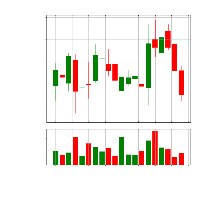

In [36]:
idx=233
x,y = data.valid_ds[idx]
x.show()
print(data.valid_ds.y[idx])

In [37]:
xb,_ = data.one_item(x)
xb_im = Image(data.denorm(xb)[0])
xb = xb.cuda()

In [38]:
m = learn.model.eval()

In [39]:
from fastai.callbacks.hooks import *

In [40]:
def hooked_backward(cat=y):
    with hook_output(m[0]) as hook_a: 
        with hook_output(m[0], grad=True) as hook_g:
            preds = m(xb)
            preds[0,int(cat)].backward()
    return hook_a,hook_g

In [41]:
hook_a,hook_g = hooked_backward()

In [42]:
acts  = hook_a.stored[0].cpu()
acts.shape

torch.Size([512, 11, 11])

In [43]:
avg_acts = acts.mean(0)
avg_acts.shape

torch.Size([11, 11])

In [46]:
def show_heatmap(hm):
    fig,ax = plt.subplots()
    xb_im.show(ax)
    ax.imshow(hm, alpha=0.6, extent=(0,352,352,0),
              interpolation='bilinear', cmap='magma');
    return fig

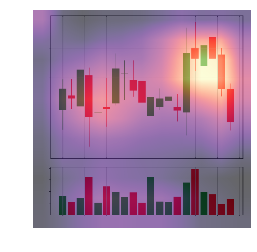

In [49]:
answer=show_heatmap(avg_acts)
answer.savefig(path/'trial.png')